# AI IN CYBER SECURITY - CIA 3 PROJECT #

Team Members

1) BadriNarayanan S (2348507)
2) Samson Sabu (2348549)

# Malware Detection #

Malware is a type of malicious software that has been used by the hackers to trace the password or any important credentials. This malware can be represented by any executable file. Windows can be impacted by malicious software. Any software that has the intent to do harmful things is defined as malware.

### Problem Statement ###

Identifying whether the piece of file or software is legitimate or malware.

Building machine learning and deep learning algorithm to detect malwares, we will be making comparisons with each model.

### Dataset Description ###

Downloaded a malware dataset, it contains

41,323 binaries (exe ,dll) - legitimate

96,724 malware files from virusshare.com

In [139]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from keras.models import Sequential
from keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, Dropout, LSTM
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, average_precision_score, balanced_accuracy_score, matthews_corrcoef, cohen_kappa_score
from sklearn.utils import class_weight
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

In [116]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\users\user\appdata\local\programs\python\python39\python.exe -m pip install --upgrade pip' command.


In [75]:
malwareData = pd.read_csv('C:\\Users\\USER\\OneDrive\\Desktop\\Cyber Security Prj\\MalwareData.csv', sep="|", low_memory =True)
malwareData.head()

,Name,md5,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,631ea355665f28d4707448e442fbf5b8,332,224,258,9,0,361984,115712,0,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,9d10f99a6712e28f8acd5641e3a7ea6b,332,224,3330,9,0,130560,19968,0,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,4d92f518527353c0db88a70fddcfd390,332,224,3330,9,0,517120,621568,0,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,a41e524f8d45f0074fd07805ff0c9b12,332,224,258,9,0,585728,369152,0,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,c87e561258f2f8650cef999bf643a731,332,224,258,9,0,294912,247296,0,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


**Inference**

These are the features in the dataset. Legitimate column is our target variable, 1 represents the original file. 0 represents the malware files.

In [76]:
malwareData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 138047 entries, 0 to 138046
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Name                         138047 non-null  object 
 1   md5                          138047 non-null  object 
 2   Machine                      138047 non-null  int64  
 3   SizeOfOptionalHeader         138047 non-null  int64  
 4   Characteristics              138047 non-null  int64  
 5   MajorLinkerVersion           138047 non-null  int64  
 6   MinorLinkerVersion           138047 non-null  int64  
 7   SizeOfCode                   138047 non-null  int64  
 8   SizeOfInitializedData        138047 non-null  int64  
 9   SizeOfUninitializedData      138047 non-null  int64  
 10  AddressOfEntryPoint          138047 non-null  int64  
 11  BaseOfCode                   138047 non-null  int64  
 12  BaseOfData                   138047 non-null  int64  
 13 

**Inference**

There is no null values in the dataset

In [77]:
malwareData.shape

(138047, 57)

In [78]:
malwareData.describe()

,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,BaseOfCode,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
count,138047.000000,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,...,138047.000000,138047.000000,138047.000000,138047.000000,1.380470e+05,1.380470e+05,1.380470e+05,1.380470e+05,138047.000000,138047.000000
mean,4259.069274,225.845632,4444.145994,8.619774,3.819286,2.425956e+05,4.504867e+05,1.009525e+05,1.719561e+05,5.779845e+04,...,22.050700,4.000127,2.434541,5.521610,5.545093e+04,1.818082e+04,2.465903e+05,4.656750e+05,12.363115,0.299340
std,10880.347245,5.121399,8186.782524,4.088757,11.862675,5.754485e+06,2.101599e+07,1.635288e+07,3.430553e+06,5.527658e+06,...,136.494244,1.112981,0.815577,1.597403,7.799163e+06,6.502369e+06,2.124860e+07,2.608987e+07,6.798878,0.457971
min,332.000000,224.000000,2.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000,0.000000
25%,332.000000,224.000000,258.000000,8.000000,0.000000,3.020800e+04,2.457600e+04,0.000000e+00,1.272100e+04,4.096000e+03,...,5.000000,3.458505,2.178748,4.828706,9.560000e+02,4.800000e+01,2.216000e+03,0.000000e+00,13.000000,0.000000
50%,332.000000,224.000000,258.000000,9.000000,0.000000,1.136640e+05,2.631680e+05,0.000000e+00,5.288300e+04,4.096000e+03,...,6.000000,3.729824,2.458492,5.317552,2.708154e+03,4.800000e+01,9.640000e+03,7.200000e+01,15.000000,0.000000
75%,332.000000,224.000000,8226.000000,10.000000,0.000000,1.203200e+05,3.850240e+05,0.000000e+00,6.157800e+04,4.096000e+03,...,13.000000,4.233051,2.696833,6.502239,6.558429e+03,1.320000e+02,2.378000e+04,7.200000e+01,16.000000,1.000000
max,34404.000000,352.000000,49551.000000,255.000000,255.000000,1.818587e+09,4.294966e+09,4.294941e+09,1.074484e+09,2.028711e+09,...,7694.000000,7.999723,7.999723,8.000000,2.415919e+09,2.415919e+09,4.294903e+09,4.294967e+09,26.000000,1.000000


Displaying the shape of original and malware files

In [79]:
legit= malwareData[0:41323].drop(["legitimate"], axis=1)
mal= malwareData[41323::].drop(["legitimate"], axis=1)
print("The shape of the legit dataset is: %s samples, %s features"%(legit.shape[0],legit.shape[1]))
print("The shape of the mal dataset is: %s samples, % s features" %(mal.shape[0],mal.shape[1]))

The shape of the legit dataset is: 41323 samples, 56 features
The shape of the mal dataset is: 96724 samples, 56 features


Visualizing the distribution of malware and original files

### Data Visualization ###

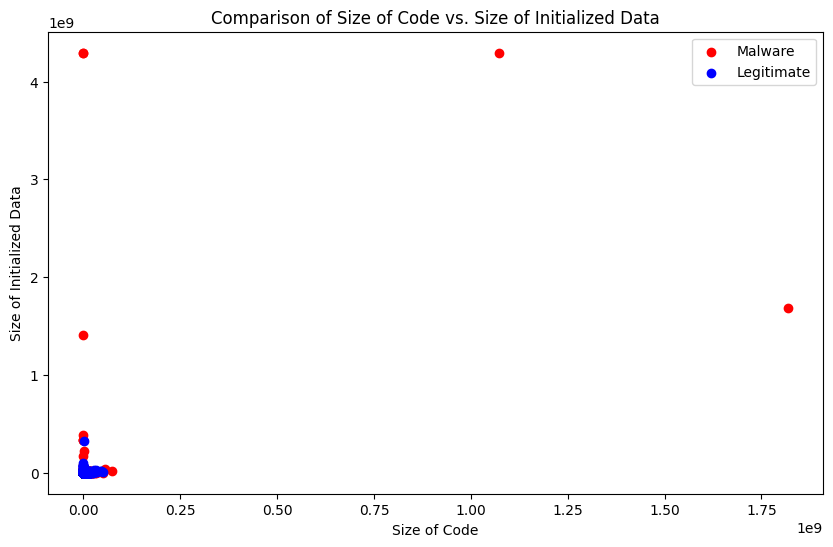

In [99]:
plt.figure(figsize=(10, 6))
plt.scatter(malwareData[malwareData['legitimate'] == 0]['SizeOfCode'], malwareData[malwareData['legitimate'] == 0]['SizeOfInitializedData'], color='red', label='Malware')
plt.scatter(malwareData[malwareData['legitimate'] == 1]['SizeOfCode'], malwareData[malwareData['legitimate'] == 1]['SizeOfInitializedData'], color='blue', label='Legitimate')
plt.xlabel('Size of Code')
plt.ylabel('Size of Initialized Data')
plt.title('Comparison of Size of Code vs. Size of Initialized Data')
plt.legend()
plt.show()

**Inference**

This visualization provides valuable insights into the structural characteristics of executable files and can help analysts identify potential indicators of malicious activity based on differences in the sizes of code and initialized data sections.

By comparing the distribution of sizes of code and initialized data between different types of executable files (e.g., legitimate vs. malware), we can identify any patterns or differences that may be indicative of certain characteristics or behaviors. 

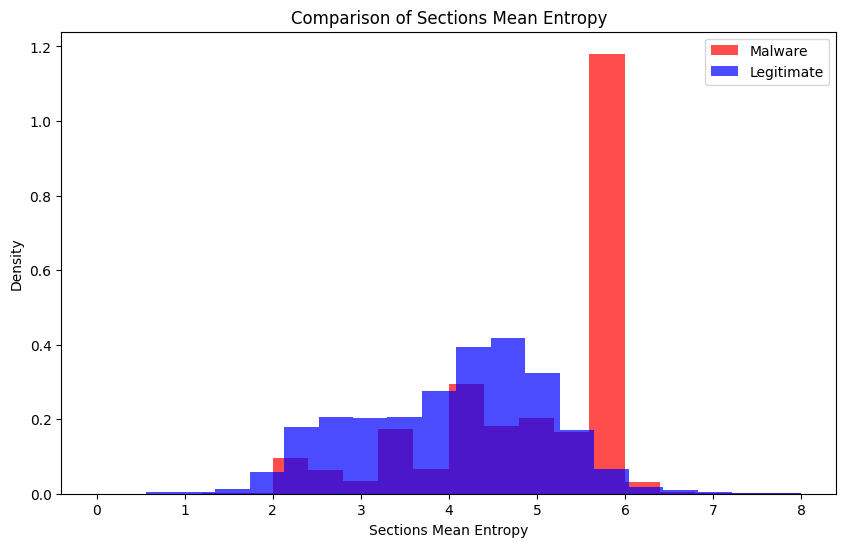

In [100]:
plt.figure(figsize=(10, 6))
plt.hist(malwareData[malwareData['legitimate'] == 0]['SectionsMeanEntropy'], bins=20, color='red', alpha=0.7, label='Malware', density=True)
plt.hist(malwareData[malwareData['legitimate'] == 1]['SectionsMeanEntropy'], bins=20, color='blue', alpha=0.7, label='Legitimate', density=True)
plt.xlabel('Sections Mean Entropy')
plt.ylabel('Density')
plt.title('Comparison of Sections Mean Entropy')
plt.legend()
plt.show()

**Inference**

In malware analysis, executable files (PE files) are typically divided into sections, each containing executable code, data, or resources. The entropy of a section measures the randomness or unpredictability of its contents. Higher entropy values indicate greater complexity or randomness, while lower entropy values indicate more regular or predictable content.

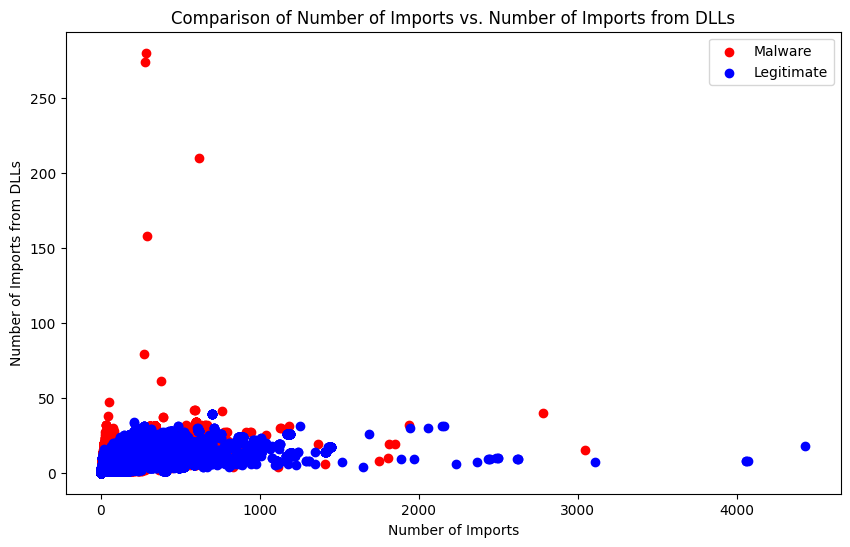

In [107]:
plt.figure(figsize=(10, 6))
plt.scatter(malwareData[malwareData['legitimate'] == 0]['ImportsNb'], malwareData[malwareData['legitimate'] == 0]['ImportsNbDLL'], color='red', label='Malware')
plt.scatter(malwareData[malwareData['legitimate'] == 1]['ImportsNb'], malwareData[malwareData['legitimate'] == 1]['ImportsNbDLL'], color='blue', label='Legitimate')
plt.xlabel('Number of Imports')
plt.ylabel('Number of Imports from DLLs')
plt.title('Comparison of Number of Imports vs. Number of Imports from DLLs')
plt.legend()
plt.show()

**Inference**

In malware analysis, this comparison can provide insights into the dependencies and external libraries used by both legitimate and potentially malicious executable files. 

By comparing the total number of imports to the number of imports from DLLs, we can gain insights into how heavily an executable relies on external libraries for its functionality. Malware often exhibits certain patterns in its import behavior, such as making a large number of imports from specific DLLs (Dynamic Link Libraries) associated with malicious activities or obfuscating imports to conceal its true functionality.

Visualizing legitimate and malware files

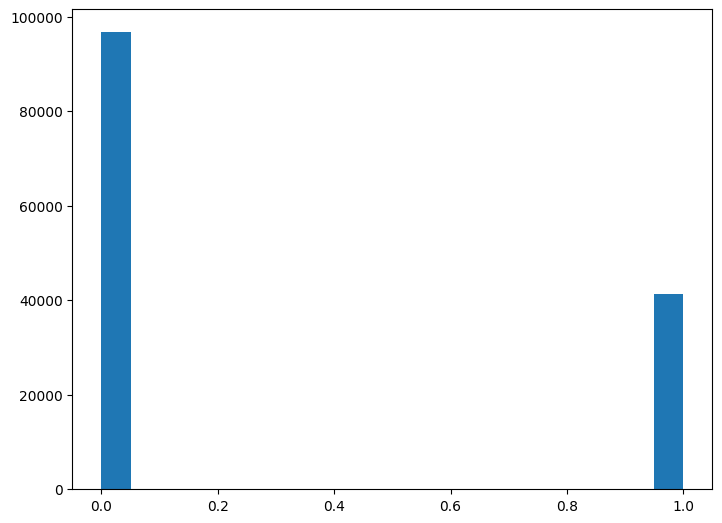

In [80]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.hist(malwareData['legitimate'],20)
plt.show()

**Inference**

The dataset is imbalanced the number of legitimate files is way more than the number of malware files.


Seperating features and the target variable

In [81]:
X = malwareData.drop(columns=["Name", "md5", "legitimate"])
y = malwareData["legitimate"]

In [82]:
malData.head()

,Name,Machine,SizeOfOptionalHeader,Characteristics,MajorLinkerVersion,MinorLinkerVersion,SizeOfCode,SizeOfInitializedData,SizeOfUninitializedData,AddressOfEntryPoint,...,ResourcesNb,ResourcesMeanEntropy,ResourcesMinEntropy,ResourcesMaxEntropy,ResourcesMeanSize,ResourcesMinSize,ResourcesMaxSize,LoadConfigurationSize,VersionInformationSize,legitimate
0,memtest.exe,332,224,258,9,0,361984,115712,0,6135,...,4,3.262823,2.568844,3.537939,8797.000000,216,18032,0,16,1
1,ose.exe,332,224,3330,9,0,130560,19968,0,81778,...,2,4.250461,3.420744,5.080177,837.000000,518,1156,72,18,1
2,setup.exe,332,224,3330,9,0,517120,621568,0,350896,...,11,4.426324,2.846449,5.271813,31102.272727,104,270376,72,18,1
3,DW20.EXE,332,224,258,9,0,585728,369152,0,451258,...,10,4.364291,2.669314,6.400720,1457.000000,90,4264,72,18,1
4,dwtrig20.exe,332,224,258,9,0,294912,247296,0,217381,...,2,4.306100,3.421598,5.190603,1074.500000,849,1300,72,18,1


**Inference**

Since these features are not important for building the model, so we are removing them.

The dataset is aldready in the form of numerical. Encoding the data is not required. And there is no missing values and we removed the unnecessary features.

Data Spliting

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
X_train.shape

(110437, 54)

In [85]:
class_weights = class_weight.compute_class_weight('balanced', classes=np.unique(y_train), y=y_train)

**Inference**

Class weights assign different weights to different classes in the dataset, allowing the model to pay more attention to the minority class (the class with fewer samples) during training. This helps prevent the classifier from being biased towards the majority class and improves its ability to correctly classify instances from all classes, including the minority class.

# Building the Model #

## Random Forest ##

In [86]:
clf = RandomForestClassifier(max_depth=2, random_state=0,class_weight=dict(enumerate(class_weights)))
randomModel=clf.fit(X_train, y_train)

Model Evaluation

In [92]:
train_pred=randomModel.predict(X_train) # Accuracy on the test dataset
accuracy_score(y_train,train_pred)

0.9795901735831288

In [93]:
prediction=randomModel.predict(X_test) # Accuracy on the test dataset

accuracy_score(y_test,prediction)

0.9807316189786309

**Inference**

The random forest model is performing well on test data.

In [94]:
f1_score(y_test, prediction)

0.9685579196217494

Confusion Matrix

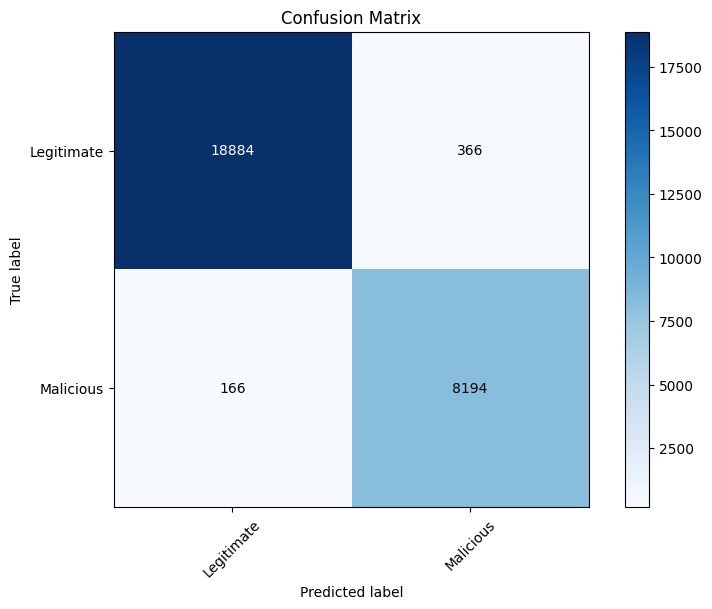

In [95]:
cm = confusion_matrix(y_test, prediction)

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ['Legitimate', 'Malicious'], rotation=45)
plt.yticks(tick_marks, ['Legitimate', 'Malicious'])

thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 ha="center", va="center", 
                 color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

**Inference**

This is the confusion matrix of the random forest model.

Other Evaluation Metrics

In [105]:
precision = precision_score(y_test, prediction)
recall = recall_score(y_test, prediction)
f1 = f1_score(y_test, prediction)
roc_auc = roc_auc_score(y_test, prediction)
average_precision = average_precision_score(y_test, prediction)
balanced_accuracy = balanced_accuracy_score(y_test, prediction)
mcc = matthews_corrcoef(y_test, prediction)
kappa = cohen_kappa_score(y_test, prediction)

In [106]:
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print("Average Precision:", average_precision)
print("Balanced Accuracy:", balanced_accuracy)
print("Matthews Correlation Coefficient:", mcc)
print("Cohen's Kappa:", kappa)

Precision: 0.9572429906542056
Recall: 0.9801435406698564
F1-score: 0.9685579196217494
ROC AUC: 0.9805652768284348
Average Precision: 0.9442478485200637
Balanced Accuracy: 0.9805652768284348
Matthews Correlation Coefficient: 0.9548090278779567
Cohen's Kappa: 0.9546703781655238


**Inference**

These evaluation metrics suggest that the Random Forest classifier performs very well on the given dataset, demonstrating high accuracy, precision, recall, and discrimination ability in distinguishing between legitimate and malicious samples. The classifier's performance is robust and reliable, with strong agreement between observed and predicted classifications.







## Logistic Regression ##

Scaling the data

In [110]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

Training the Logistic Regression classifier

In [111]:
clf = LogisticRegression(random_state=42)
clf.fit(X_train_scaled, y_train)

LogisticRegression(random_state=42)

Predictions on the test set

In [112]:
y_pred = clf.predict(X_test_scaled)
y_pred_proba = clf.predict_proba(X_test_scaled)[:, 1] 

Evaluation Metrics

In [113]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

In [114]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print("Average Precision:", average_precision)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.9802969938428105
Precision: 0.9715250965250966
Recall: 0.9631578947368421
F1-score: 0.9673234022104757
ROC AUC: 0.9960127757410053
Average Precision: 0.9924668306019215
Confusion Matrix:
 [[19014   236]
 [  308  8052]]


**Inference**

The logistic regression model demonstrates strong performance in classifying executable files as either legitimate or malicious. With high accuracy, precision, recall, F1-score, ROC AUC, and average precision, the model effectively distinguishes between the two classes. 

The ROC AUC score indicates excellent discriminative power, while the high average precision suggests robust performance across different levels of recall. 

Confusion matrix shows a high number of true positives and true negatives, indicating that the model successfully identifies both legitimate and malicious samples with minimal misclassifications. Overall, these results suggest that the logistic regression model is effective for malware detection in the given dataset.

## XG Boost ##

In [118]:
clf = xgb.XGBClassifier(random_state=42)
clf.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

Predictions on test set

In [119]:
y_pred = clf.predict(X_test)
y_pred_proba = clf.predict_proba(X_test)[:, 1]

Evaluation Metrics

In [120]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_pred_proba)
average_precision = average_precision_score(y_test, y_pred_proba)
conf_matrix = confusion_matrix(y_test, y_pred)

In [121]:
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("ROC AUC:", roc_auc)
print("Average Precision:", average_precision)
print("Confusion Matrix:\n", conf_matrix)

Accuracy: 0.995907279971025
Precision: 0.9916537498509598
Recall: 0.9948564593301435
F1-score: 0.9932525228399116
ROC AUC: 0.9997806499720376
Average Precision: 0.9993544732197082
Confusion Matrix:
 [[19180    70]
 [   43  8317]]


**Inference**

With high accuracy, precision, recall, F1-score, ROC AUC, and average precision, the model effectively distinguishes between the two classes. The confusion matrix further confirms the model's ability to correctly identify both legitimate and malicious samples with minimal misclassifications. XG Boost model is performing well.

## Convolutional Neural Network ##

CNNs are widely used in image recognition tasks, but they can also be adapted for sequence-based data, such as byte sequences or opcode sequences extracted from executable files.

Reshape the input data to match CNN input requirements

In [132]:
X = np.expand_dims(X, axis=2)

Data Split

In [133]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


### CNN Model Architecture ###

In [134]:
model = Sequential()
model.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

Compiling the model

In [135]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Training the Model

In [136]:
buildCNN = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 26s 7ms/step - accuracy: 0.8942 - loss: 90883864.0000 - val_accuracy: 0.6977 - val_loss: 12.8671
Epoch 2/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7033 - loss: 30640.5859 - val_accuracy: 0.6972 - val_loss: 4.2896
Epoch 3/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 21s 6ms/step - accuracy: 0.6997 - loss: 11.0847 - val_accuracy: 0.6972 - val_loss: 0.7686
Epoch 4/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.7024 - loss: 0.9675 - val_accuracy: 0.6972 - val_loss: 0.6316
Epoch 5/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 19s 5ms/step - accuracy: 0.6991 - loss: 28.1536 - val_accuracy: 0.6972 - val_loss: 0.6130
Epoch 6/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7010 - loss: 0.6096 - val_accuracy: 0.6972 - val_loss: 0.6130
Epoch 7/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 20s 6ms/step - accuracy: 0.7016 - loss: 0.6092 - val_accuracy: 0.6972 - val_loss: 0.6130
Epoch 8/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 22s 6ms/step - accuracy: 0.

Evaluation on test data

In [137]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

863/863 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.7019 - loss: 0.6063
Test Accuracy: 0.6972111463546753


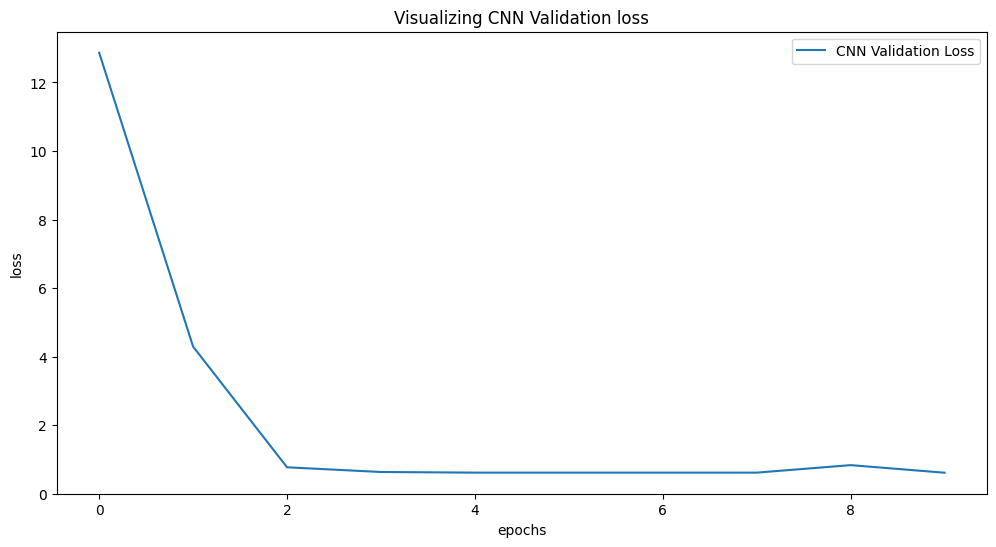

In [157]:
plt.figure(figsize=(12,6))
plt.plot(buildCNN.history['val_loss'],label="CNN Validation Loss")
plt.title("Visualizing CNN Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

**Inference**

CNN model for malware detection achieved an accuracy of approximately 69.72% on the test set after 10 epochs of training. CNN model achieved some level of learning from the training data, its performance on the test set remains relatively low

## LSTM (Long Short Term Memory) ##

LSTMs are particularly suitable for sequential data, such as byte sequences or opcode sequences extracted from executable files.

In [140]:
X = np.reshape(X, (X.shape[0], X.shape[1], 1))

In [141]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### Model Architecture ###

In [142]:
model = Sequential()
model.add(LSTM(units=64, input_shape=(X_train.shape[1], 1), return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=64))
model.add(Dropout(0.2))
model.add(Dense(units=1, activation='sigmoid'))


c:\users\user\appdata\local\programs\python\python39\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Compile the model

In [143]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


Training the Model

In [144]:
buildLSTM = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 146s 41ms/step - accuracy: 0.9387 - loss: 0.1529 - val_accuracy: 0.9843 - val_loss: 0.0474
Epoch 2/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 171s 50ms/step - accuracy: 0.9855 - loss: 0.0479 - val_accuracy: 0.9882 - val_loss: 0.0386
Epoch 3/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 283s 82ms/step - accuracy: 0.9885 - loss: 0.0379 - val_accuracy: 0.9886 - val_loss: 0.0349
Epoch 4/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 216s 63ms/step - accuracy: 0.9891 - loss: 0.0365 - val_accuracy: 0.9898 - val_loss: 0.0323
Epoch 5/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 144s 42ms/step - accuracy: 0.9895 - loss: 0.0347 - val_accuracy: 0.9903 - val_loss: 0.0278
Epoch 6/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 151s 44ms/step - accuracy: 0.9905 - loss: 0.0308 - val_accuracy: 0.9896 - val_loss: 0.0297
Epoch 7/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 192s 41ms/step - accuracy: 0.9905 - loss: 0.0303 - val_accuracy: 0.9913 - val_loss: 0.0271
Epoch 8/10
3452/3452 ━━━━━━━━━━━━━━━━━━━━ 146s 42ms/step - accuracy: 

Evaluating Test Accuracy

In [152]:
loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

863/863 ━━━━━━━━━━━━━━━━━━━━ 13s 15ms/step - accuracy: 0.9913 - loss: 0.0254
Test Accuracy: 0.991235077381134


**Inference**

The LSTM model is giving good test accuracy.

Visualizing LSTM Validation Loss

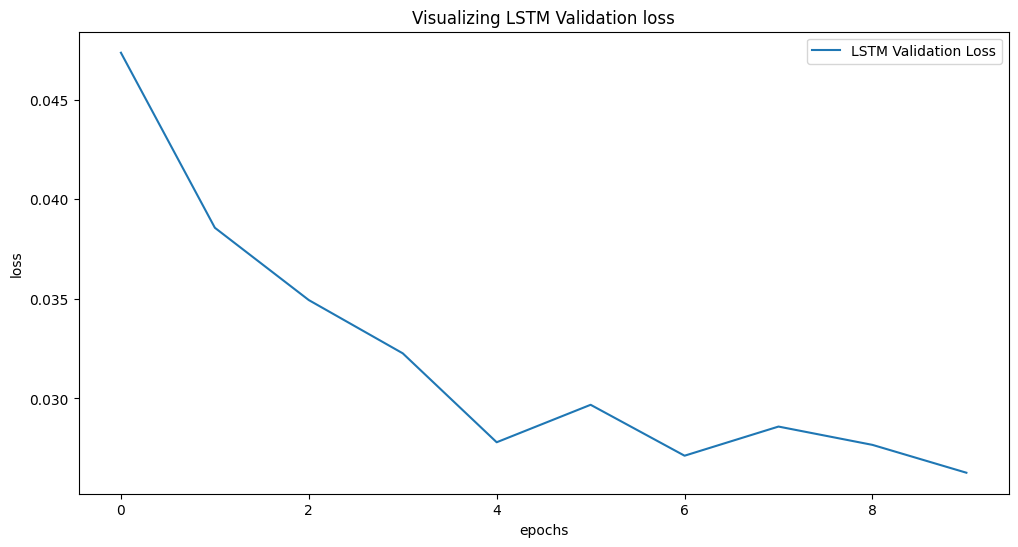

In [158]:
plt.figure(figsize=(12,6))
plt.plot(buildLSTM.history['val_loss'],label="LSTM Validation Loss")
plt.title("Visualizing LSTM Validation loss")
plt.xlabel("epochs")
plt.ylabel("loss")
plt.legend()
plt.show()

**Inference**

The loss value steadily decreases during training, indicating that the model effectively minimizes its error on the training and validation data. The validation loss decreases to approximately 0.0263 after 10 epochs, demonstrating that the model's predictions closely match the ground truth labels.

LSTM model demonstrates excellent performance in malware detection, achieving high accuracy and effectively minimizing loss. When comparing to CNN, LSTM is better for malware detection according to this dataset.




# Conclusion #

Machine learning algorithms like Random Forest, Logistic Regression, XGBoost are performed well. Deep Learning algorithms like Long short term memory(LSTM) performed well on malware detection. CNN model haven't performed well for this malware detection. Malware attacks are happening a lot in windows etc. Just an executable file it does a lot of damage. By leveraging these kind of machine learning and deep learning algorithms we can detect the file whether it is legitimate or malware. 